In [1]:
import pandas 
import numpy as np
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import numpy as np


In [2]:
df = pandas.read_csv('avarage_paths.csv')

In [3]:
df['fitted'] = (df['nodes'] ** 0.5) / 10 * 3
df['b'] = df['edges']/df['nodes']
df['d'] = 2*df['edges']/df['nodes']/df['nodes']
df['avg_norm'] = df['average_path']/df['nodes']


In [4]:
df

,Unnamed: 0,nodes,edges,average_path,fitted,b,d,avg_norm
0,0,3121,4405,35.292508,16.759773,1.411407,0.000904,0.011308
1,1,5237,7815,50.077209,21.710136,1.492267,0.000570,0.009562
2,2,839,1140,27.640079,8.689649,1.358760,0.003239,0.032944
3,3,3053,3914,43.386827,16.576188,1.282018,0.000840,0.014211
4,4,1503,2264,25.665514,11.630563,1.506321,0.002004,0.017076
...,...,...,...,...,...,...,...,...
614,614,1698,2417,30.490101,12.362039,1.423439,0.001677,0.017956
615,615,465,564,17.382638,6.469158,1.212903,0.005217,0.037382
616,616,5141,6743,34.213277,21.510230,1.311613,0.000510,0.006655
617,617,3270,4878,26.105319,17.155174,1.491743,0.000912,0.007983


In [5]:
df_all = df


In [6]:
df = df_all[df_all['nodes'] > 1000]

In [15]:
X = np.array(df['d'])
Y = np.array(df['avg_norm'])

X  = np.log(X)
Y = np.log(Y)

args = np.argsort(X)
X = X[args]
Y = Y[args]

def f(x,a,b):
    return a*x+b

popt = curve_fit(f, X,Y)
predict = f(X, *popt[0])
print(popt[0])
print(r2_score(Y,predict))

[0.71763153 0.49418504]
0.919233764343461


In [8]:
1.4 ** 0.72 * 1.6

2.038600696917614

0.919233764343461


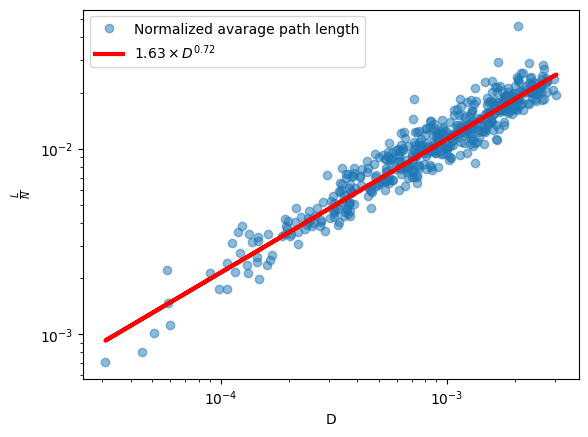

In [41]:
from sklearn.metrics import r2_score 
plt.loglog(df['d'],df['avg_norm'],'o', alpha = 0.5, label = 'Normalized avarage path length')
plt.loglog(df['d'],1.63*df['d']**0.72 ,c='r',linewidth=3, label = r'$1.63\times D^{0.72}$' )
plt.legend()
plt.xlabel('D')
plt.ylabel(r'$\frac{L}{N}$')
# plt.title('Scatter plot with Fit')
    
plt.savefig('plot.png')
print(r2_score(Y,predict))


0.919233764343461


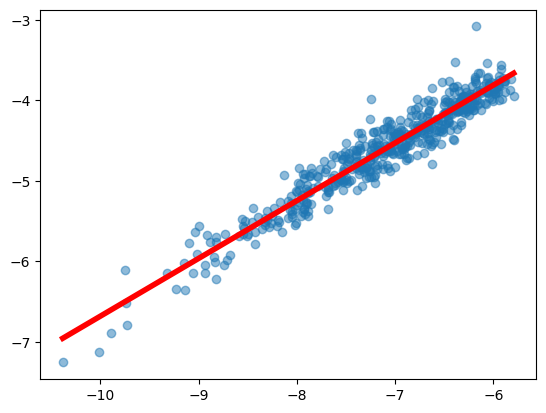

In [26]:
from sklearn.metrics import r2_score 
plt.plot(X,Y,'o', alpha = 0.5)
plt.plot(X,predict,c='r',linewidth=4)

print(r2_score(Y,predict))

[1.34204485 0.68590883]
delta: 0.14544218091560873


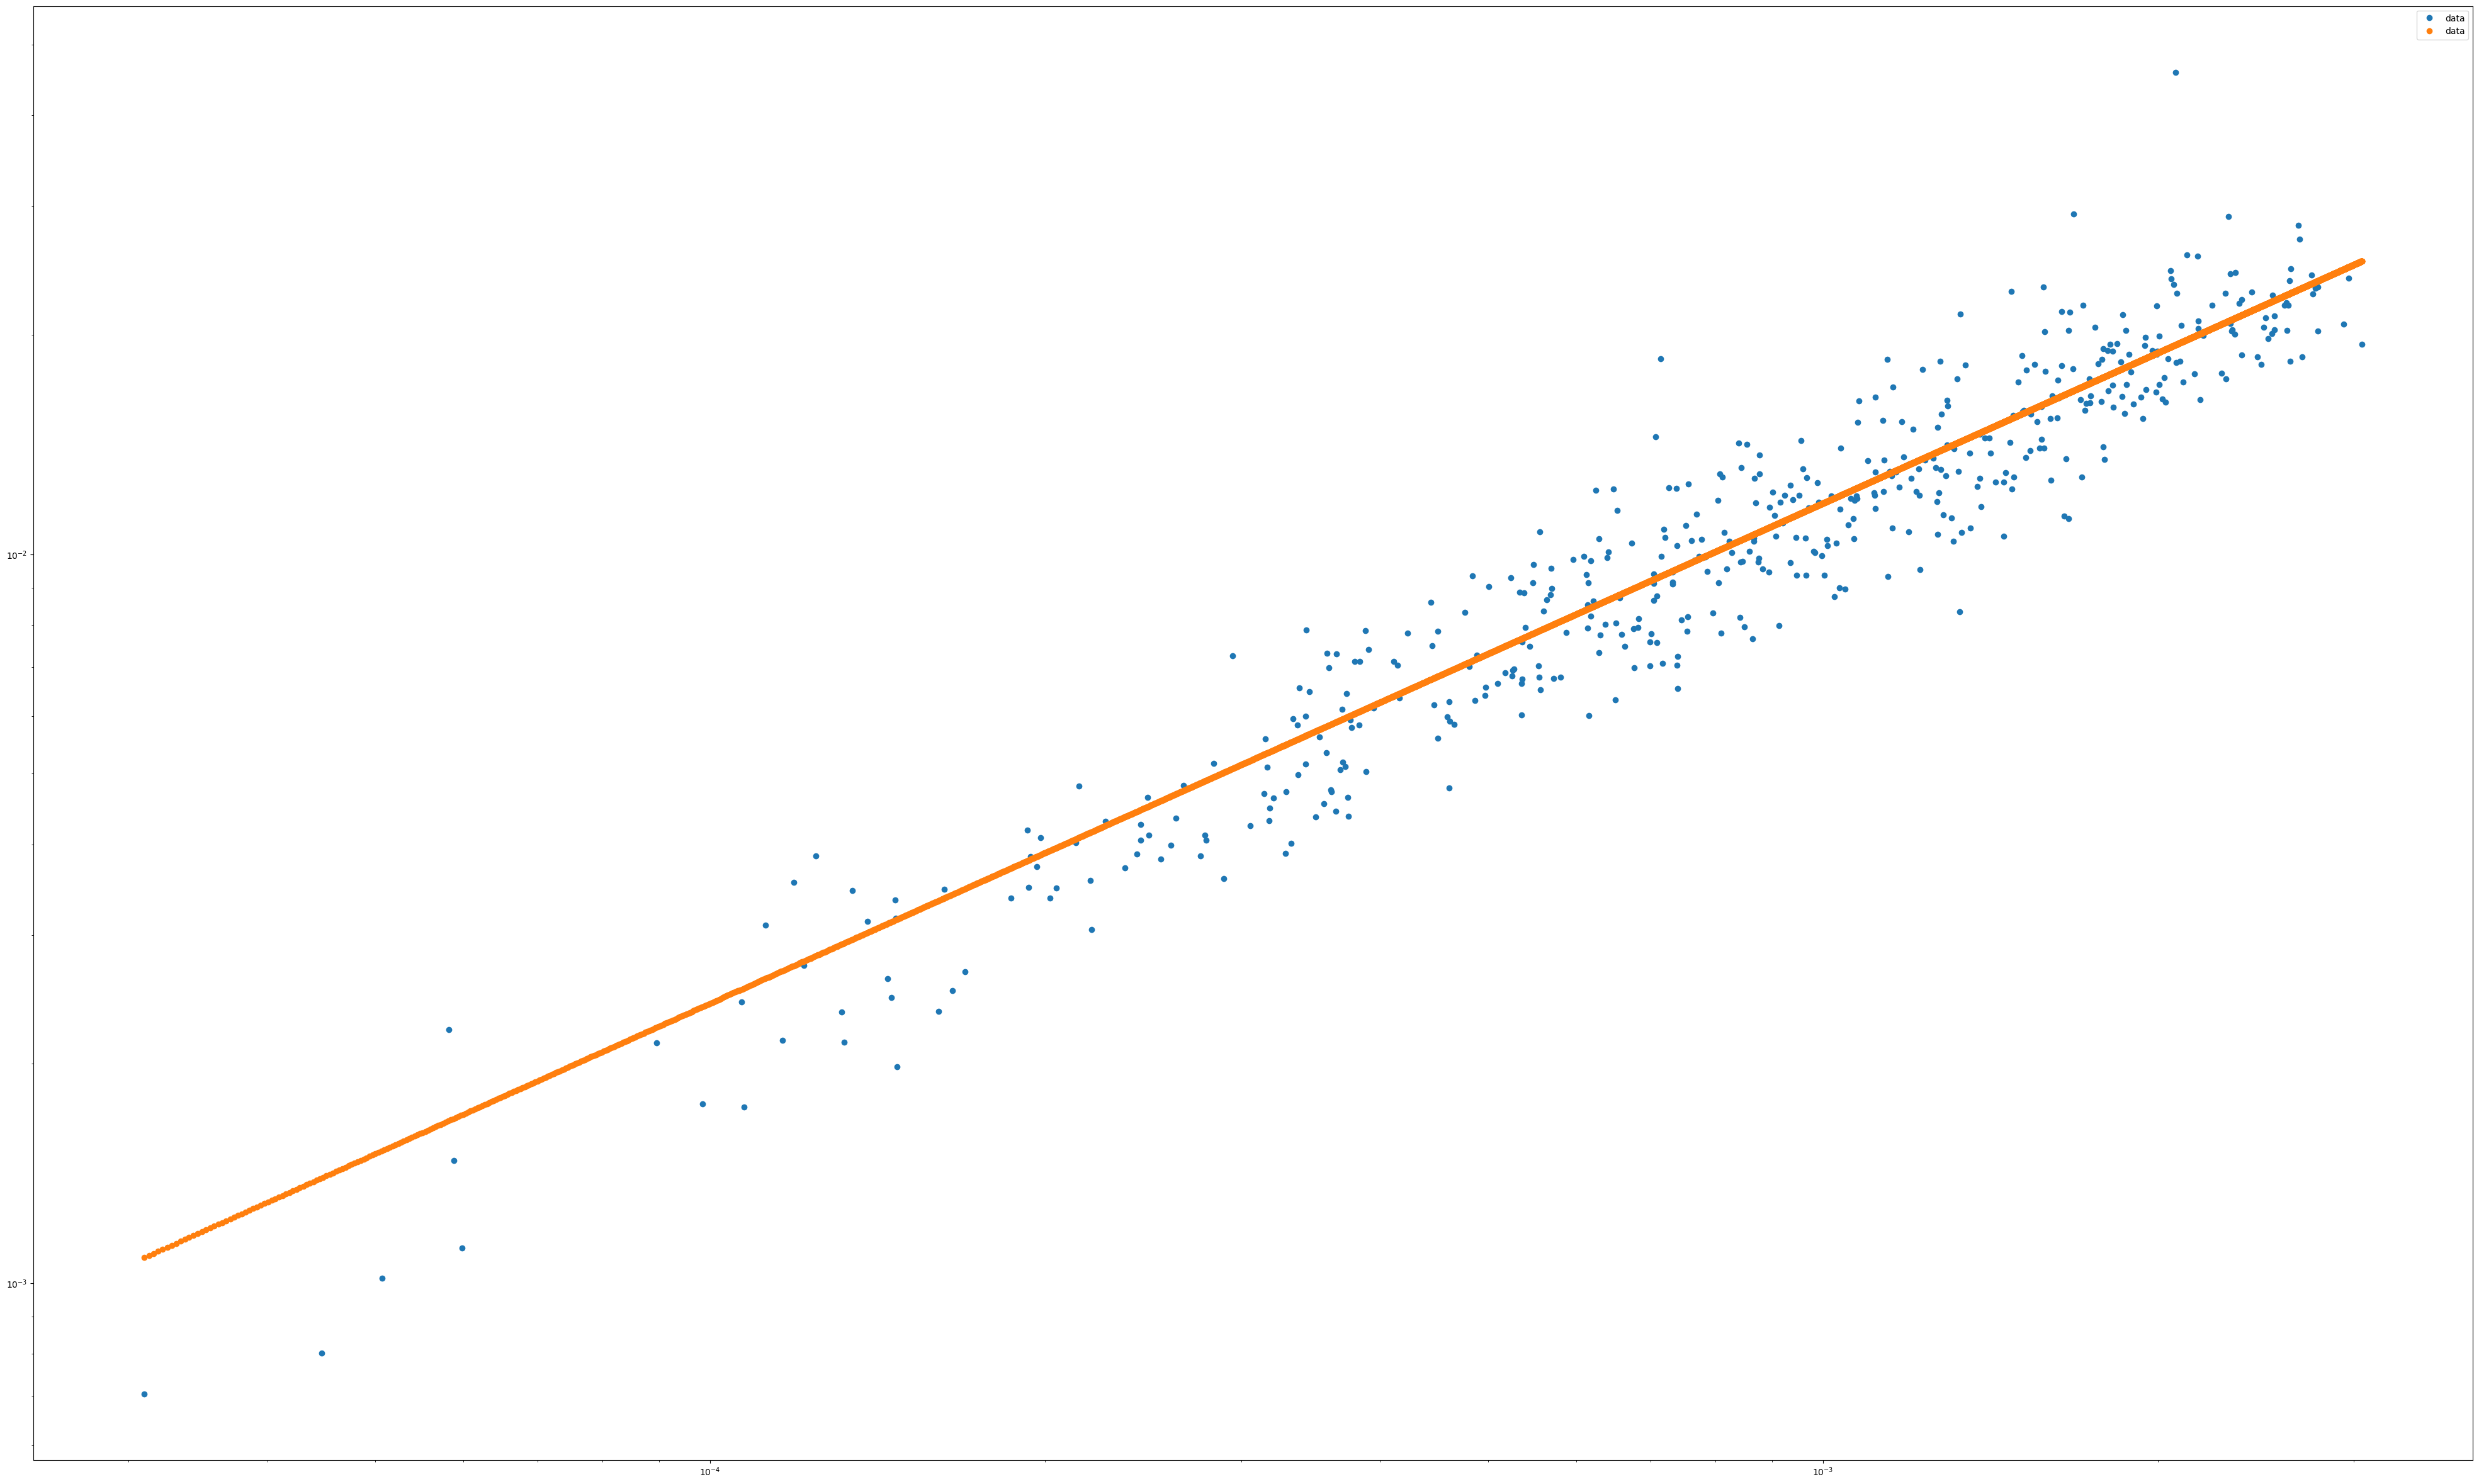

In [10]:

X = 'd'
Y = 'avg_norm'

def f(x,a, b):
    return a * (x ** b)
popt = curve_fit(f, df[X], df[Y])

print(popt[0])
print('delta:',np.mean(abs(f(df[X], *popt[0]) - df[Y])/df[Y]))

fig, axs = plt.subplots(1, 1)
fig.set_figwidth(50)
fig.set_figheight(30)
np.e * 1

xx = np.linspace(min(df[X]), max(df[X]), 10000)
yy = f(xx, *popt[0])
axs.loglog(df[X], df[Y],'o', label = 'data')
axs.loglog(xx,yy,'o', label = 'data')

axs.legend()

[1011.94520834]
0.2763350183351777
0.16368579346410994


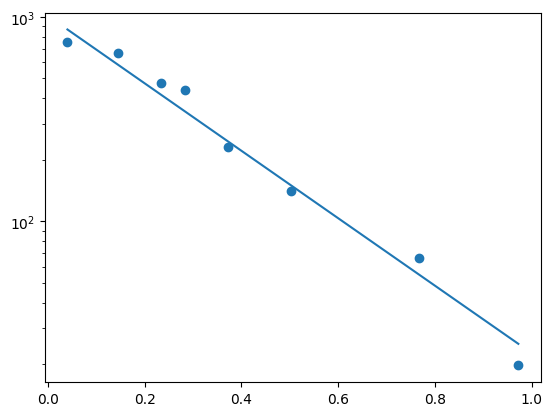

In [11]:
x = np.array([0.04037862613587849, 0.14509734888653208, 0.23361572074412534, 0.2824322724300775, 0.37289240050362604, 0.5032203615679591, 0.7669775634250731, 0.9723732543860238])
Mass = np.array([31.3*24, 669, 19.7*24,  440, 230, 140, 66, 19.7])

# x_Fer = [0.04037862613587849, 0.23361572074412534, 0.9723732543860238]
# Mass_Fer = [31.3*24, 19.7*24, 19.7]

from scipy.optimize import curve_fit

def func(x,a):
    return a * np.e**(x * -3.8)
popt = curve_fit(func, x,Mass)
popt[0] # оптимальный a,b

print(popt[0])

plt.scatter(x, Mass)
plt.plot(x, func(x, *popt[0]))
# plt.scatter(x_Fer, Mass_Fer)
plt.yscale('log')

err = (Mass - func(x, *popt[0]))/Mass
print(np.sqrt(np.max(err*err)))
print(np.sqrt(np.mean(err*err)))

In [12]:
print(popt[0])

[1011.94520834]
